 # Machine Learning Model Implementation (Iris Dataset)

This notebook demonstrates the process of building, training, and evaluating a machine learning classification model using `scikit-learn` in Python. We will use the famous Iris dataset for this example.

## Section 1: Import Libraries

We start by importing all necessary libraries for data manipulation, machine learning, and visualization.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB # Or other classification models like LogisticRegression, RandomForestClassifier, SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os # To handle output directories if needed

## Section 2: Load the Dataset

The Iris dataset is a classic dataset in machine learning, often used for classification tasks. It contains 150 samples of iris flowers, each with 4 features (sepal length, sepal width, petal length, petal width) and a target variable indicating the species (setosa, versicolor, virginica).

In [ ]:
from sklearn.datasets import load_iris

print("--- Loading Dataset ---")
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())
print("\nTarget names:", iris.target_names)

--- Loading Dataset ---
Features (X) head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) head:
0    0
1    0
2    0
3    0
4    0
dtype: int32

Target names: ['setosa' 'versicolor' 'virginica']


## Section 3: Exploratory Data Analysis (EDA) - Basic

Before modeling, it's essential to understand the basic structure and characteristics of our data. We'll check data types, descriptive statistics, and look for missing values. We'll also visualize the distribution of the target classes.


--- Performing Basic EDA ---

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB

Dataset Description:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000    

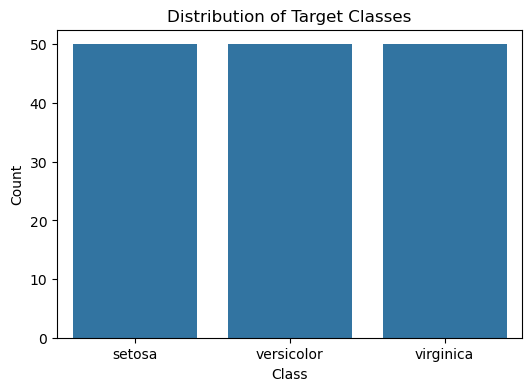

In [ ]:
print("\n--- Performing Basic EDA ---")
print("\nDataset Info:")
X.info()
print("\nDataset Description:")
print(X.describe())
print("\nMissing values:")
print(X.isnull().sum())

# Visualize target distribution (display directly in notebook)
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show() # Use plt.show() to display in the notebook

# If you still want to save it to a file:
# output_dir = 'output_plots'
# os.makedirs(output_dir, exist_ok=True)
# plt.savefig(os.path.join(output_dir, 'target_distribution.png'))
# plt.close()

## Section 4: Data Preprocessing

This step involves preparing the data for the machine learning model. We will split the dataset into training and testing sets to evaluate the model on unseen data, and then apply feature scaling to ensure features contribute equally to the model's learning.


In [ ]:
print("\n--- Performing Data Preprocessing ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Data scaled.")


--- Performing Data Preprocessing ---
Training set size: 105 samples
Testing set size: 45 samples
Data scaled.


## Section 5: Model Selection and Training

We choose a Gaussian Naive Bayes classifier, which is suitable for normally distributed numerical features. The model is then trained on the scaled training data.

In [ ]:
print("\n--- Training Model ---")
model = GaussianNB()
model.fit(X_train_scaled, y_train)
print("Model training complete.")


--- Training Model ---
Model training complete.


## Section 6: Model Prediction

After training, we use the model to make predictions on the unseen test dataset.

In [ ]:
print("\n--- Generating Predictions ---")
y_pred = model.predict(X_test_scaled)
print("Predictions on test set generated.")


--- Generating Predictions ---
Predictions on test set generated.


## Section 7: Model Evaluation

Model performance is assessed using various metrics such as accuracy, precision, recall, f1-score, and a confusion matrix. These metrics help us understand how well the model is performing and where it might be making errors.


--- Evaluating Model Performance ---
Accuracy: 0.9111

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



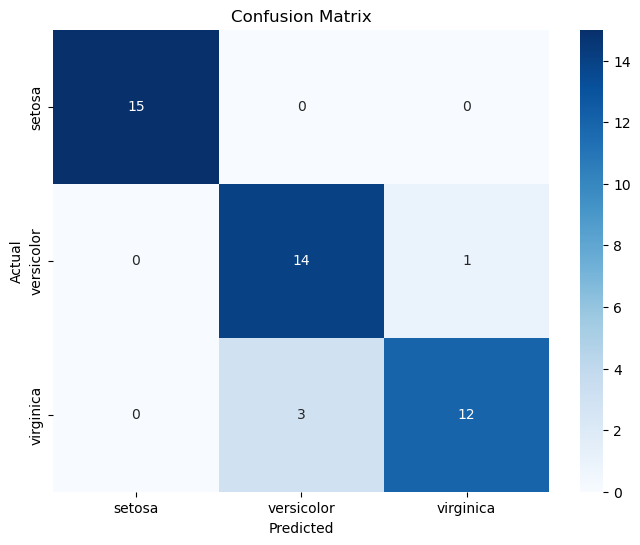

In [ ]:
print("\n--- Evaluating Model Performance ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)
# You can still save the report to a file if needed, but printing is usually sufficient for notebooks.
# with open(os.path.join(output_dir, 'classification_report.txt'), 'w') as f:
#     f.write(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show() # Use plt.show() to display in the notebook

# If you still want to save it to a file:
# plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
# plt.close()

# print(f"Evaluation results (accuracy, report, confusion matrix) saved to '{output_dir}'.") # Remove or comment out if not saving to file

## Section 8: Make a Single Prediction (Optional)

Finally, we demonstrate how to use the trained model to make a prediction on a new, unseen data point. Remember that new data points must be preprocessed (scaled) in the same way the training data was.

In [ ]:
print("\n--- Demonstrating Single Prediction ---")
new_data_point = np.array([[5.1, 3.5, 1.4, 0.2]]) # Example Iris features

# Scale the new data point
# Suppress the UserWarning if you're okay with the array input
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    new_data_point_scaled = scaler.transform(new_data_point)

predicted_class_index = model.predict(new_data_point_scaled)[0]
predicted_class_name = iris.target_names[predicted_class_index]

print(f"New data point: {new_data_point}")
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")

print("\nScript finished.")


--- Demonstrating Single Prediction ---
New data point: [[5.1 3.5 1.4 0.2]]
Predicted class index: 0
Predicted class name: setosa

Script finished.
